# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
sizes = [10, 50, 500, 5000]
samples = []
rng = np.random.default_rng()
for size in sizes:
    samples.append(rng.normal(loc=50, scale=5, size=size))

tests = [stats.normaltest(sample)[1] for sample in samples] # extract pvalue
print(tests)

[0.997862444776428, 0.3502316728833559, 0.2504189800460054, 0.9317850493771639]


#### Interpret the normaltest results and make your observations.

In [3]:
# An arbitrary alpha (confidence) should be selected and then compared to the pvalue. If the pvalue is lower than alpha the null hypothesis can be rejected (null hypothesis: sample comes from a normal distribution).


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

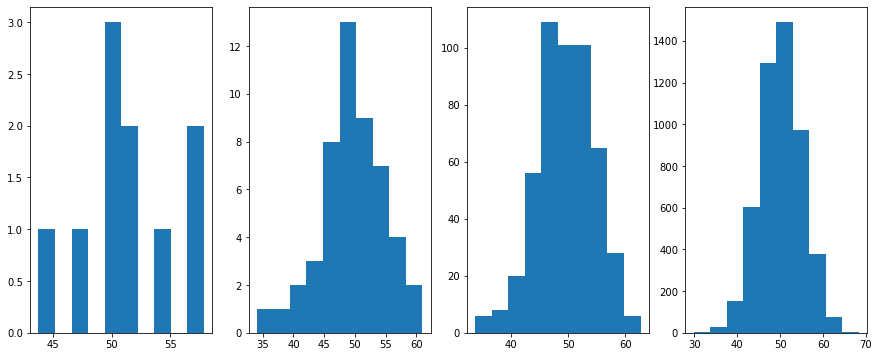

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(15, 6))
for ax, sample in zip(axs, samples):
    ax.hist(sample)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [5]:
# The bigger the sample size, the more it will ressemble a normal distribution.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

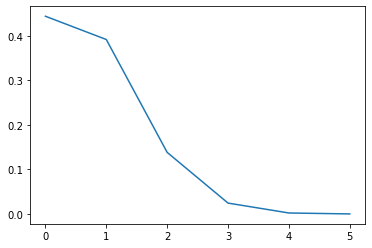

In [6]:
k = np.arange(6)
pmf = stats.binom.pmf(k, n=5, p=0.15)
fig, ax = plt.subplots()
ax.plot(k, pmf)

#### Explain what you observe from the plot above

In [7]:
# The most probable event is that nobody clicks the Ad, followed by 1 person clicking, etc.

#### Now plot PMP with 50, 500, and 5000 visitors.

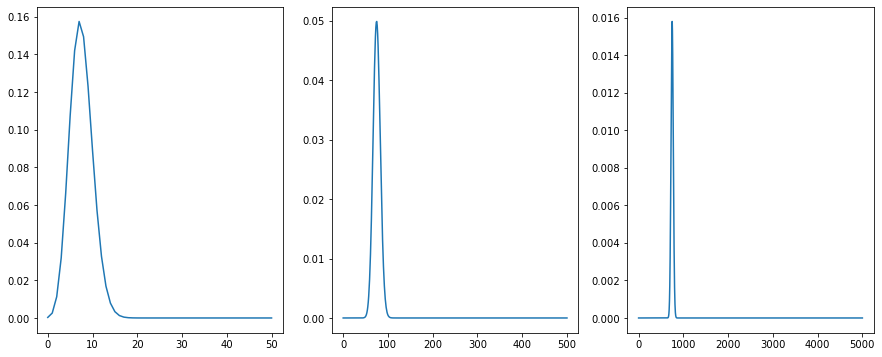

In [8]:
n_visitors = (50, 500, 5000)
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
for n, ax in zip(n_visitors, axs):
    k = np.arange(n + 1)
    pmf = stats.binom.pmf(k, n=n, p=0.15)
    ax.plot(k, pmf)

#### What did you notice from the distribution plots? Comment your findings.

In [9]:
# The bigger the repetitions (n) the narrower the bell area (proportionally).

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [10]:
# In probability theory and statistics, the Poisson distribution, named after French mathematician Siméon Denis Poisson, is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [11]:
p_320 = stats.poisson.pmf(320, mu=300)
print(p_320)

0.011612348610402475


#### What is the probability of getting 60 visits?

In [12]:
p_60 = stats.poisson.pmf(60, mu=300)
print(p_60)

2.622743762294515e-64


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

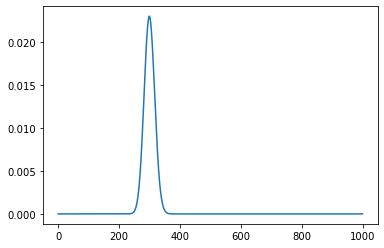

In [13]:
k = np.arange(1001)
pmf = stats.poisson.pmf(k, mu=300)
fig, ax = plt.subplots()
ax.plot(k, pmf)